In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plot_utils import *

In [3]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *

In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

In [6]:
params_list=[
({'xj':'1-3,2-3','en':2000,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(5),'L':np.array([8,10,12,14,16])}),
({'xj':'1-3,2-3','en':1000,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(10),'L':np.array([16,18,])}),
({'xj':'1-3,2-3','en':125,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(80),'L':np.array([20])}),
({'xj':'1-3,2-3','en':100,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(100),'L':np.array([22])})
]



In [7]:
for fixed_params,vary_params in params_list:
    data_1_3_anc_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}_T.pickle',
        fn_dir_template='Data/Metrics/{xj}_anc_T/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}_T.pickle', 
    )

Loading data_dict Data/Metrics/1-3,2-3_anc_T/xj(1-3,2-3)_anc_T.pickle


generate_params: 100%|██████████| 154025/154025 [00:07<00:00, 19495.88it/s]


Loading data_dict Data/Metrics/1-3,2-3_anc_T/xj(1-3,2-3)_anc_T.pickle


generate_params: 100%|██████████| 123220/123220 [00:05<00:00, 20751.77it/s]


Loading data_dict Data/Metrics/1-3,2-3_anc_T/xj(1-3,2-3)_anc_T.pickle


generate_params: 100%|██████████| 492880/492880 [00:14<00:00, 32949.77it/s]


Loading data_dict Data/Metrics/1-3,2-3_anc_T/xj(1-3,2-3)_anc_T.pickle


generate_params: 100%|██████████| 616100/616100 [00:22<00:00, 27738.28it/s]


In [8]:
fns=set(os.listdir('Data/Metrics/1-3,2-3_anc_T'))

In [9]:
len(data_1_3_anc_T_dict['fn'])

1390

In [10]:
len(fns)

1391

In [215]:
([fn for fn in fns-data_1_3_anc_T_dict['fn']])

['xj(1-3,2-3)_anc_T.pickle']

In [9]:
df_1_3_anc_T=convert_pd(data_1_3_anc_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

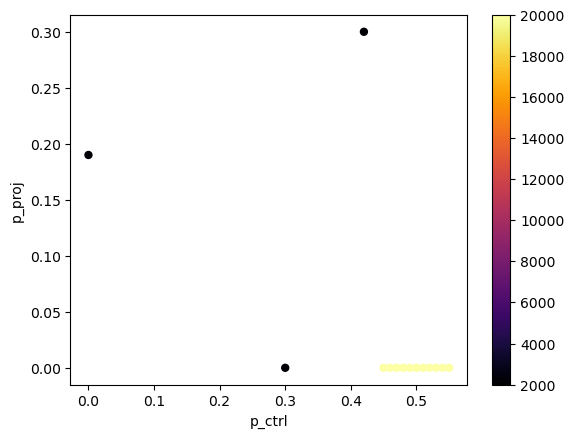

In [11]:
visualize_dataset(df_1_3_anc_T,params={'Metrics':'SA','L':16,'T':0},xlabel='p_ctrl',ylabel='p_proj')

# General plot

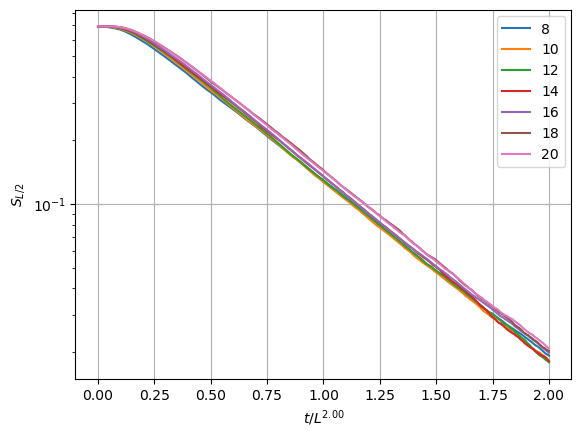

In [230]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.0).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

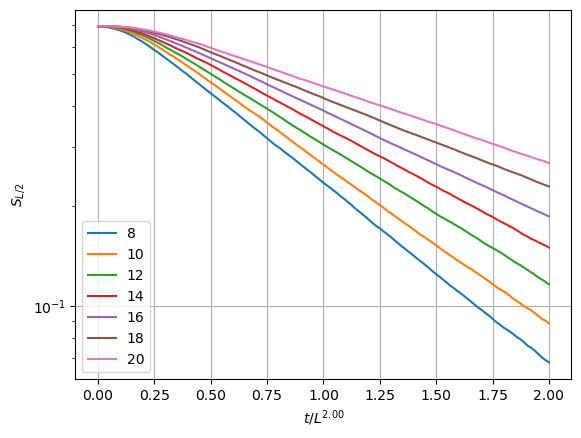

In [225]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.45).xs(level='p_proj',key=0.0).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

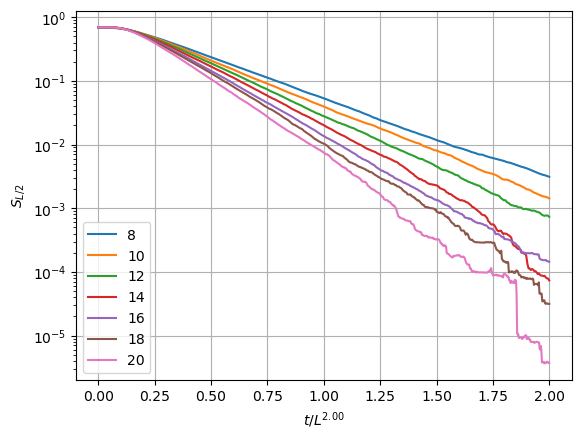

In [228]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.55).xs(level='p_proj',key=0.0).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

# tau vs L 

In [ ]:
fit tau?

In [86]:
from scipy import stats

In [91]:
tau={}

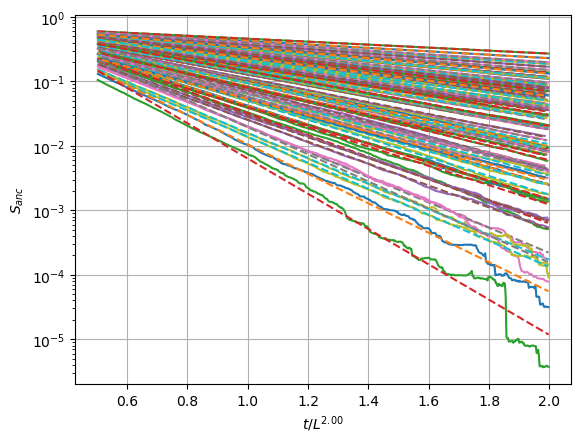

In [92]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
# p_ctrl=0.55
p_proj=0.0
p_ctrl_list=np.round(np.arange(.45,.55,.01),2)
for p_ctrl in p_ctrl_list:
    for L in L_list:
        data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=p_proj).xs(level='L',key=L).sort_index()['observations']
        
        y=data.apply(np.mean)
        T_range=(0.5*L**2,2*L**2)
        y=y[(y.index<T_range[1]) & (y.index>T_range[0])]
        slope, intercept, r_value, p_value, std_err = stats.linregress(y.index, np.log(y.values))
        tau[(L,p_ctrl,p_proj)]=-1/slope
        
        ax.plot((y.index)/L**z,y,label=L)
        ax.plot((y.index)/L**z,np.exp(y.index*slope+intercept),'--')
    # ax.legend()
    ax.grid('on')
    # ax.set_xlim(0,80/L_list[0]**z)
    ax.set_ylabel('$S_{anc}$')
    ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
    ax.set_yscale('log')

In [93]:
df_tau=convert_pd(tau,names=['L','p_ctrl','p_proj'])

In [94]:
L_list

array([ 8, 10, 12, 14, 16, 18, 20])

In [99]:
tau_L={}

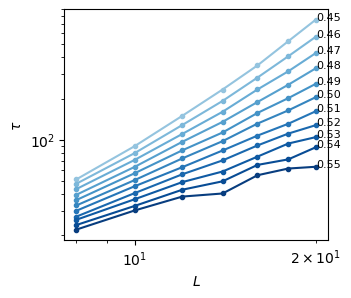

In [160]:
fig,ax=plt.subplots(figsize=(3.4,3))
# p_ctrl=0.53
p_proj=0
color_list=(plt.cm.Blues(0.4+0.6*(i/11)) for i in range(11))
for p_ctrl in np.round(np.arange(0.45,0.55,0.01),2):
    data=df_tau.xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=p_proj).sort_index()['observations']
    ax.plot(data.index,data.values,'.-',label=p_ctrl,color=next(color_list))
    ax.text(22,data.values[-1],f'{p_ctrl:.2f}',fontsize=8,ha='right')
    tau_L[p_ctrl]=np.array([data.index,data.values])
# ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$L$')
ax.set_ylabel('$\\tau$')
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/tau.pdf',bbox_inches='tight',pad_inches=0)

In [104]:
tau_L[0.45][0]

array([ 8., 10., 12., 14., 16., 18., 20.])

In [130]:
z_tau={}
r_value_tau={}
std_err_tau={}
for key, val in tau_L.items(): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(val[0]), np.log(val[1]))
    z_tau[key]=slope
    r_value_tau[key]=r_value
    std_err_tau[key]=std_err

In [ ]:
stats errorbar

In [118]:
z_tau

{0.45: 2.932128859548716,
 0.46: 2.705589647286153,
 0.47: 2.50095590046153,
 0.48: 2.3206571342818996,
 0.49: 2.135975240208833,
 0.5: 1.9905962038893084,
 0.51: 1.8173150196820493,
 0.52: 1.6907270785684068,
 0.53: 1.5359145375952008,
 0.54: 1.4014574413067264,
 0.55: 1.181062553359312}

In [131]:
std_err_tau

{0.45: 0.07620573922882391,
 0.46: 0.066186401353442,
 0.47: 0.052360815586517895,
 0.48: 0.037376858785891025,
 0.49: 0.026960519095751177,
 0.5: 0.015710721540968895,
 0.51: 0.00920587222808549,
 0.52: 0.02106641087070537,
 0.53: 0.035233819681885006,
 0.54: 0.04414749394926086,
 0.55: 0.07831847647765006}

In [120]:
r_value_tau

{0.45: 0.9983155780893552,
 0.46: 0.9985072729031612,
 0.47: 0.9989059741168681,
 0.48: 0.999352109778575,
 0.49: 0.9996019435099448,
 0.5: 0.9998443086462268,
 0.51: 0.9999358542815474,
 0.52: 0.9996120986061964,
 0.53: 0.9986869860099031,
 0.54: 0.9975283904918407,
 0.55: 0.9891848527494107}

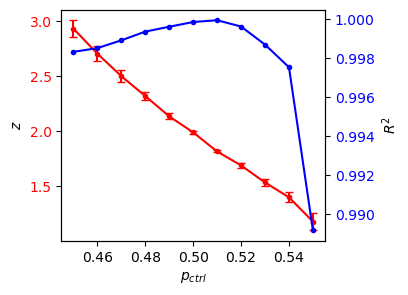

In [159]:
fig,ax=plt.subplots(figsize=(3.4,3))
ax.errorbar(list(z_tau.keys()),list(z_tau.values()),yerr=list(std_err_tau.values()),fmt='.-',color='r',capsize=3)
ax2=ax.twinx()
ax2.plot(list(r_value_tau.keys()),list(r_value_tau.values()),'.-',color='b')
ax2.set_ylabel('$R^2$')
ax.set_ylabel('$z$')
ax.set_xlabel('$p_{ctrl}$')
ax2.tick_params(axis='y', labelcolor='b')
ax.tick_params(axis='y', labelcolor='r')
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z.pdf',bbox_inches='tight',pad_inches=0)

# Data collapse for different t ~ L^z

# with z=2

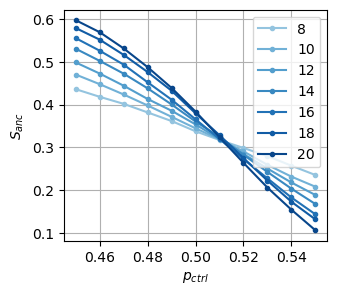

In [158]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots(figsize=(3.4,3))
z=2
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/2))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])
# fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2_k2.pdf',bbox_inches='tight',pad_inches=0)


In [149]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)

In [150]:
dc.datacollapse(p_c=0.502,nu=1.1)

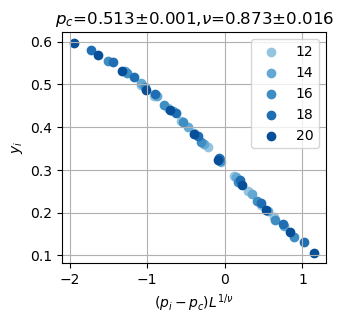

In [157]:
fig,ax=plt.subplots(figsize=(3.4,3))
dc.plot_data_collapse(ax=ax)
# fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2_k2_dc.pdf',bbox_inches='tight',pad_inches=0)

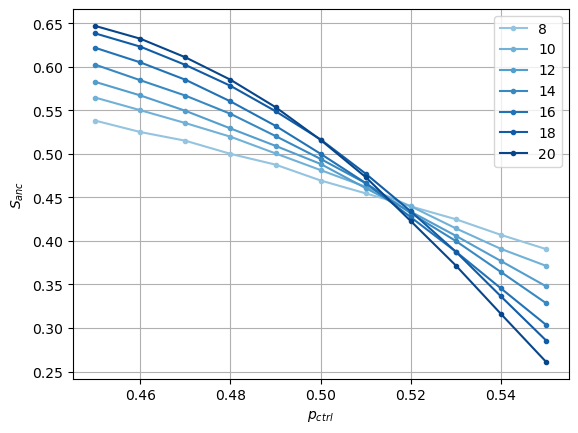

In [166]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/3))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])

fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2_k3.pdf',bbox_inches='tight',pad_inches=0)


In [164]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.512,nu=1.1)

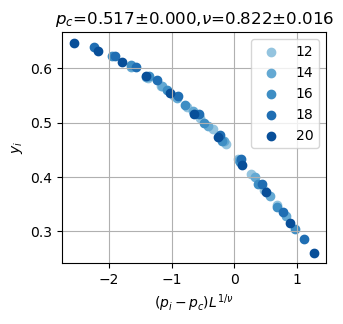

In [172]:
fig,ax=plt.subplots(figsize=(3.4,3))
dc.plot_data_collapse(ax)
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2_k3_dc.pdf',bbox_inches='tight',pad_inches=0)

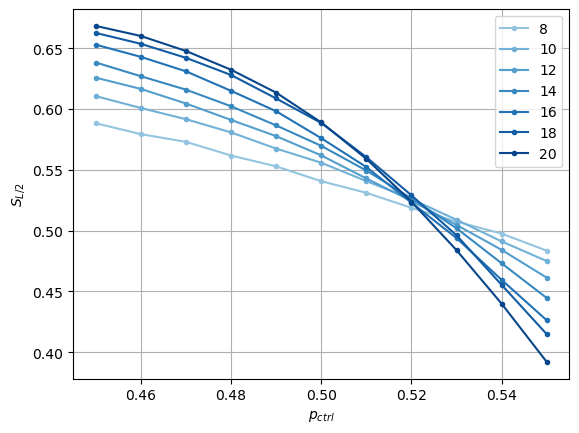

In [383]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/4))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])

In [384]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.502,nu=1.1)

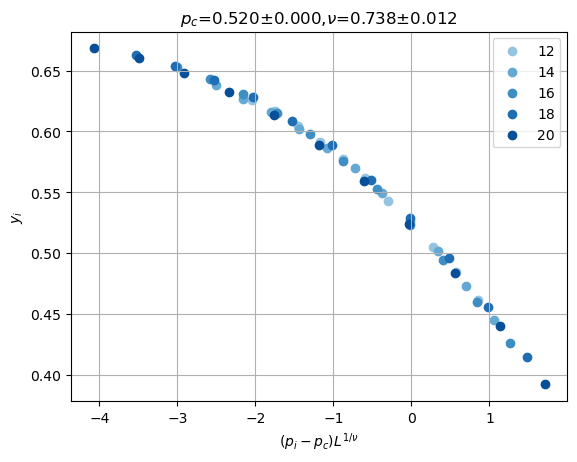

In [385]:
dc.plot_data_collapse()

# with z=2.5

In [175]:
(20**2.5)/(20**2*2)

2.23606797749979

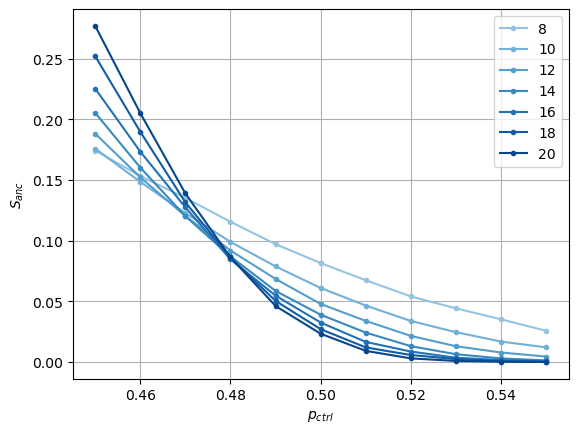

In [25]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.5
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
p_proj=0
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=p_proj).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/2.3))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])

# fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2.5_k2.3.pdf',bbox_inches='tight',pad_inches=0)

In [26]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)


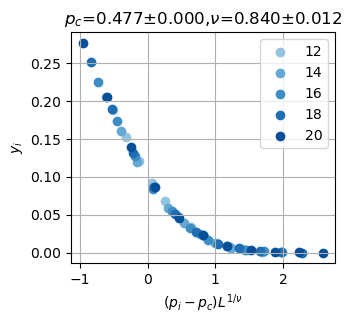

In [27]:
fig,ax=plt.subplots(figsize=(3.4,3))
dc.plot_data_collapse(ax)
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2.5_k2.3_dc.pdf',bbox_inches='tight',pad_inches=0)

In [185]:
df_small

observations
Metrics L  p_ctrl p_proj                                                   
SA      8  0.45   0.0     [0.17673044, 0.31367603, 1.1920943e-07, -2.384...
           0.46   0.0     [0.111408815, 0.2360141, 1.1920943e-07, -2.384...
           0.47   0.0     [0.111408815, 0.2360141, 1.1920936e-07, 3.8595...
           0.48   0.0     [0.111408815, 0.2360141, 1.1920946e-07, 0.0045...
           0.49   0.0     [0.111408815, 0.4156731, 1.9218737e-13, 0.0047...
...                                                                     ...
        20 0.51   0.0     [2.721496e-12, -2.3841736e-07, 4.2903582e-13, ...
           0.52   0.0     [-2.3841595e-07, 1.1920959e-07, 6.868121e-13, ...
           0.53   0.0     [-2.3841845e-07, -2.3841828e-07, 8.2365206e-14...
           0.54   0.0     [-2.3841858e-07, -2.3841845e-07, -2.3841854e-0...
           0.55   0.0     [5.4970944e-14, 3.0668537e-13, 1.4692737e-13, ...

[77 rows x 1 columns]

100%|██████████| 27/27 [00:07<00:00,  3.84it/s]


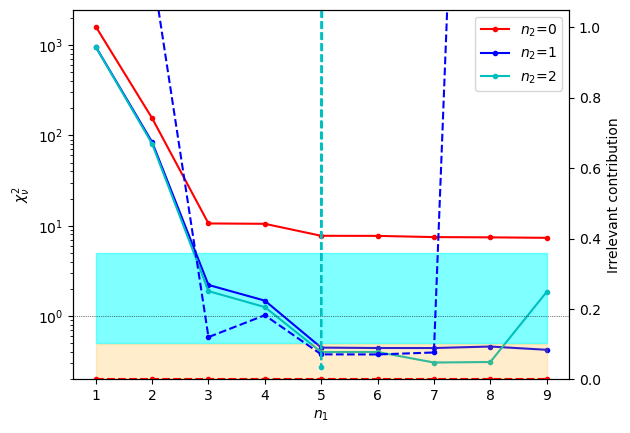

In [188]:
model=grid_search(n1_list=np.arange(1,10),n2_list=np.arange(3),p_c=0.471,nu=0.7,y=2.5,verbose=False,df=df_small,params={'Metrics':'SA','p_proj':0.0},Lmin=8,Lmax=20,p_range=[.45,.56],p_='p_ctrl',L_='L')
plot_chi2_ratio(model)

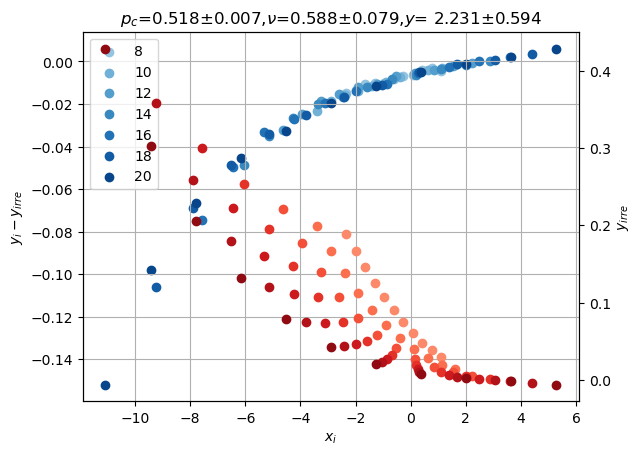

In [190]:
model[3,2].plot_data_collapse(drift=True,driftcollapse=True)  

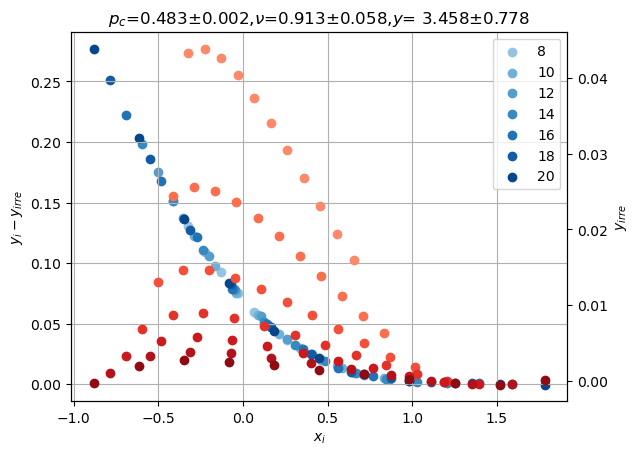

In [192]:
model[5,2].plot_data_collapse(drift=True,driftcollapse=True)  

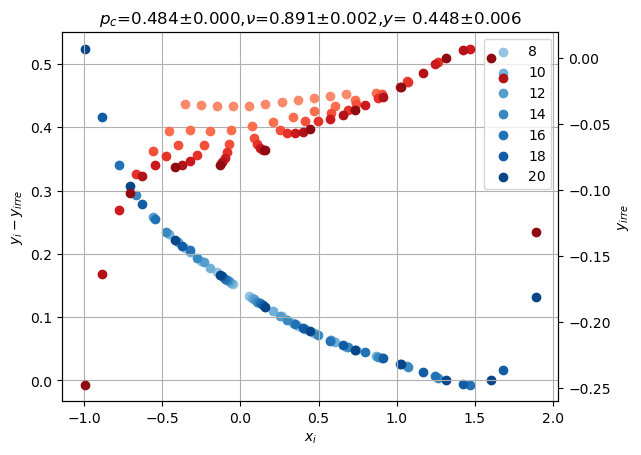

In [195]:
model[6,2].plot_data_collapse(drift=True,driftcollapse=True)  

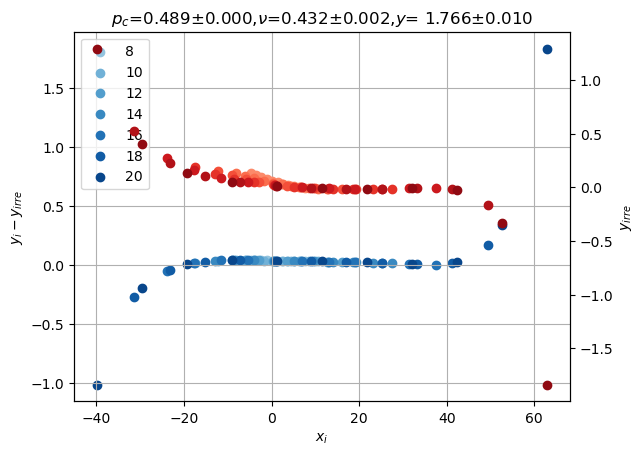

In [194]:
model[7,2].plot_data_collapse(drift=True,driftcollapse=True)  

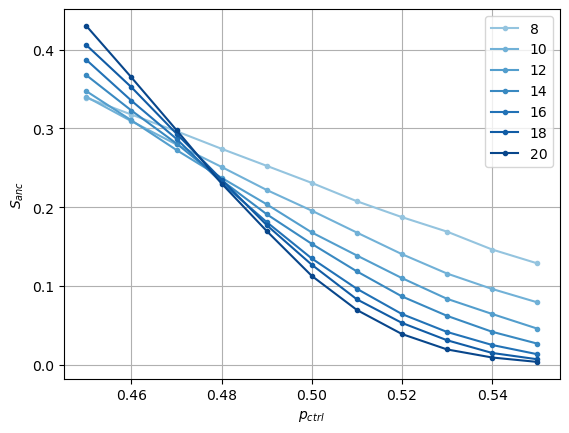

In [20]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.5
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
p_proj=0
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=p_proj).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/4))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])

fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2.5_k4.pdf',bbox_inches='tight',pad_inches=0)

In [21]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)

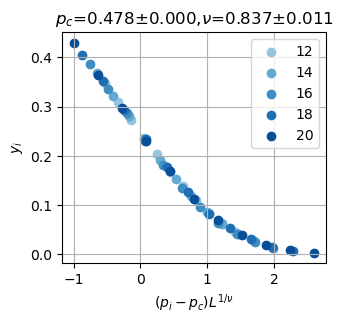

In [23]:
fig,ax=plt.subplots(figsize=(3.4,3))
dc.plot_data_collapse(ax)
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/z2.5_k4_dc.pdf',bbox_inches='tight',pad_inches=0)

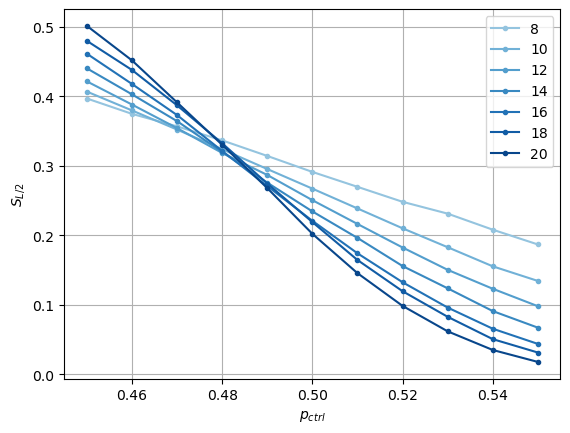

In [31]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.4
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/4))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])


In [32]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)

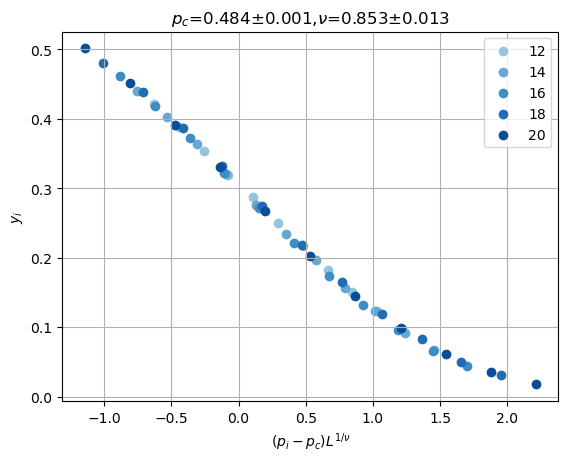

In [33]:
dc.plot_data_collapse()

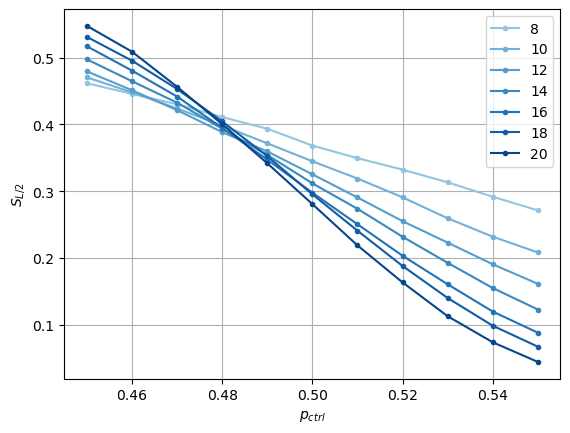

In [34]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.4
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/5))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])


In [35]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)

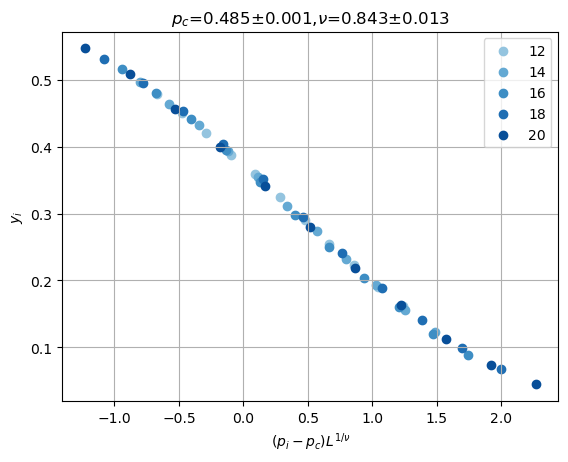

In [36]:
dc.plot_data_collapse()

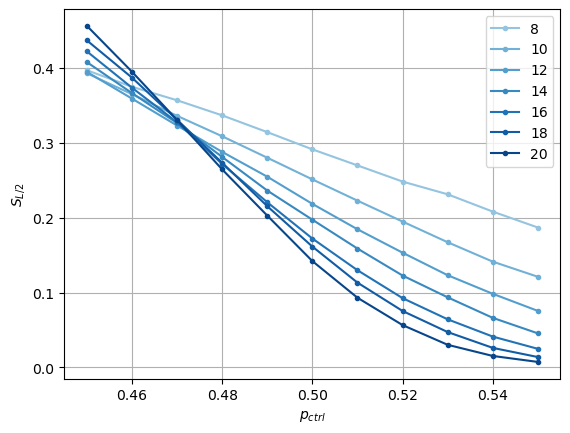

In [406]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.6
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/6))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])


In [407]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)

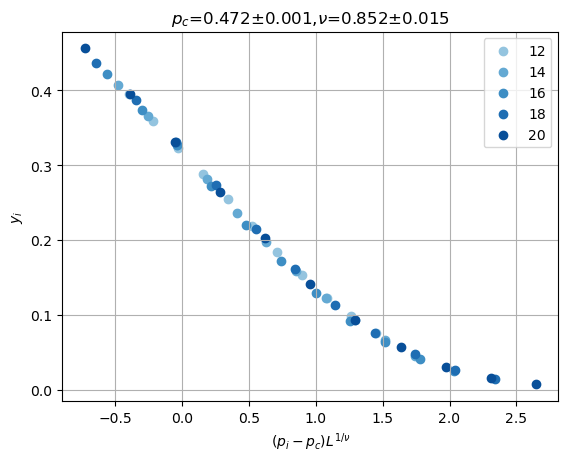

In [408]:
dc.plot_data_collapse()

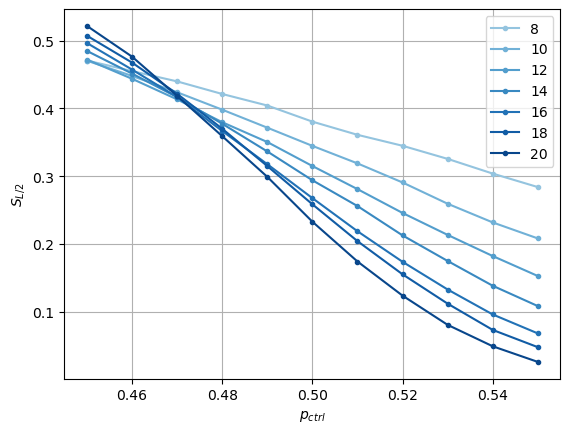

In [398]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.6
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
small_ensemble={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/8))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    for p_ctrl,val in data.items():
        small_ensemble[('SA',L,p_ctrl,p_proj)]=val
        
    y=data.apply(np.mean)

    ax.plot(y.index,y.values,'.-',label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel('$p_{ctrl}$')
# ax.set_yscale('log')
df_small=convert_pd(small_ensemble,names=['Metrics','L','p_ctrl','p_proj'])


In [404]:
dc=DataCollapse(df_small,p_='p_ctrl',L_='L',params={'Metrics':'SA'},p_range=[.45,.56],Lmin=12,Lmax=20)
dc.datacollapse(p_c=0.471,nu=0.7)

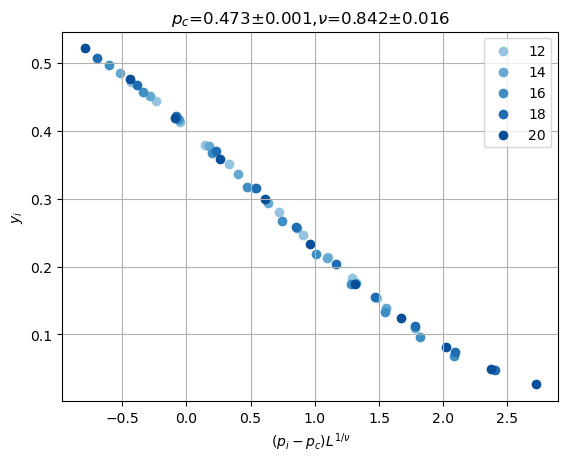

In [405]:
dc.plot_data_collapse()

In [ ]:
stably??

In [ ]:

bootstrap?


# S_anc ~ t/L^z

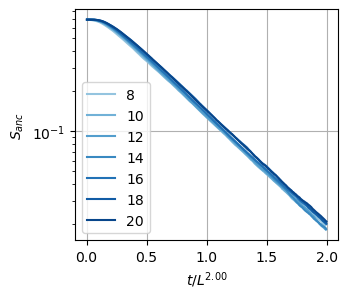

In [170]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots(figsize=(3.4,3))
z=2
p_ctrl=0.5
p_proj=0.0
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=p_proj).xs(level='L',key=L).sort_index()['observations']
    y=data.apply(np.mean)
    T_range=(0.0*L**2,2*L**2)
    y=y[(y.index<T_range[1]) & (y.index>T_range[0])]
    ax.plot((y.index)/L**z,y,label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/S_t_z2.pdf',bbox_inches='tight',pad_inches=0)

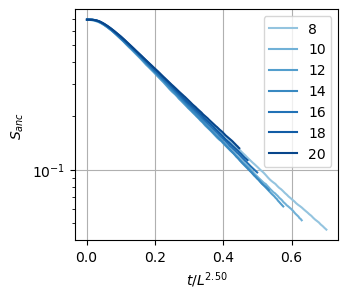

In [171]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots(figsize=(3.4,3))
z=2.5
p_ctrl=0.47
p_proj=0.0
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=p_proj).xs(level='L',key=L).sort_index()['observations']
    y=data.apply(np.mean)
    T_range=(0.*L**2,2*L**2)
    y=y[(y.index<T_range[1]) & (y.index>T_range[0])]
    ax.plot((y.index)/L**z,y,label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')
fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/S_t_z2.5.pdf',bbox_inches='tight',pad_inches=0)

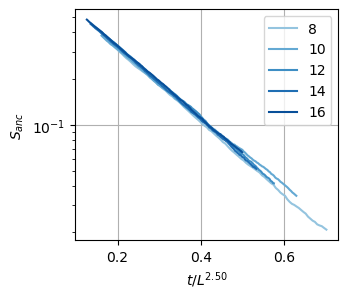

In [78]:
L_list=np.arange(8,18,2)
fig,ax=plt.subplots(figsize=(3.4,3))
z=2.5
p_ctrl=0.42
p_proj=0.3
color_list=(plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(11))

for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=p_proj).xs(level='L',key=L).sort_index()['observations']
    y=data.apply(np.mean)
    T_range=(0.5*L**2,2*L**2)
    y=y[(y.index<T_range[1]) & (y.index>T_range[0])]
    ax.plot((y.index)/L**z,y,label=L,color=next(color_list))
ax.legend()
ax.grid('on')
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')
# fig.savefig('/mnt/d/Rutgers/Rp_CT/Fig_S_anc_T/S_t_z2.6.pdf')

In [71]:
zz=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/2)))['observations']

Text(0.5, 0, '$t/L^{1.00}$')

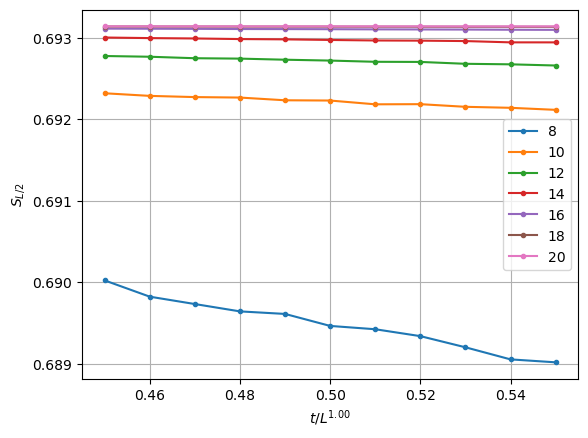

In [238]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=1
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/4))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot(data.index.values,y,'.-',label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
# ax.set_yscale('log')

Text(0.5, 0, '$t/L^{2.00}$')

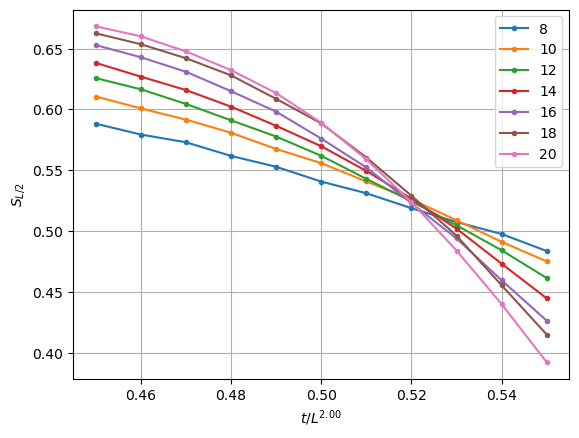

In [237]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/4))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot(data.index.values,y,'.-',label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
# ax.set_yscale('log')

Text(0.5, 0, '$t/L^{2.70}$')

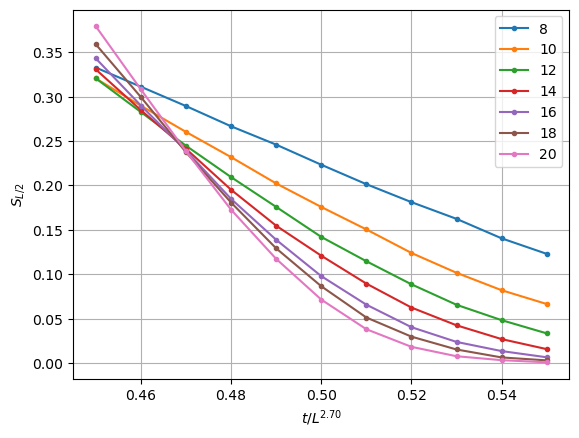

In [236]:
L_list=np.arange(8,22,2)
fig,ax=plt.subplots()
z=2.7
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/6))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot(data.index.values,y,'.-',label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
# ax.set_yscale('log')

In [ ]:
the crossing should also be invariant t/L^z, only the correct t_f ~ k* L^z that is invariant by different k

z<z_c, decrease k, will make p_c drift to large

z>z_c,  ??

Also drifting at L is something to check


In [155]:
crossings

array([[0.53188856, 0.50554714],
       [0.51579305, 0.53218222],
       [0.52428931, 0.51596309],
       [0.51932139, 0.52804867],
       [0.53245661, 0.48611275]])

In [ ]:

crossings=np.array([find_intersection(data0[L_list[idx]],data0[L_list[idx+1]]) for idx in range(len(L_list)-1)])
ax.plot(crossings[:,0],'.-')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

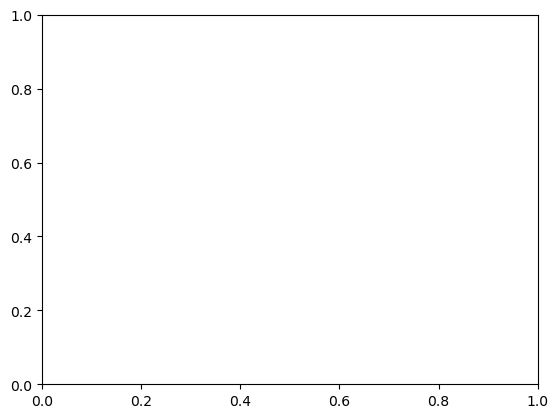

In [184]:
L_list=np.arange(8,20,2)
fig,ax=plt.subplots()
z=2.6
data0={}
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_proj',key=0.0).xs(level='L',key=L).xs(level='T',key=int(np.round(L**z/3.))).sort_index()['observations']
    data=data[data.index>0.4]
    t_list=data.index
    y=data.apply(np.mean)
    data0[L]=np.array([data.index.values,y])
    # ax.plot(,y,'.-',label=L)

crossings=np.array([find_intersection(data0[L_list[idx]],data0[L_list[idx+1]]) for idx in range(len(L_list)-1)])
ax.plot(crossings[:,0],'.-')

# ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
# ax.set_yscale('log')

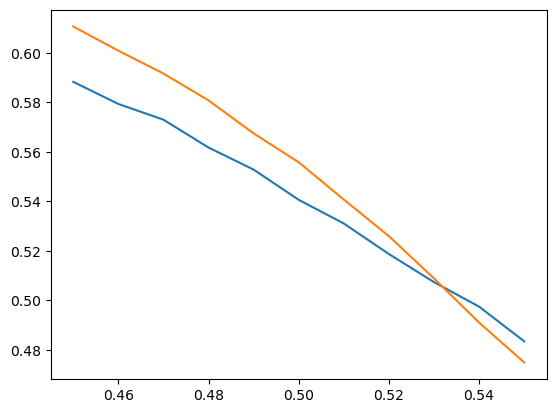

In [120]:
plt.plot(data0[8][0],data0[8][1])
plt.plot(data0[10][0],data0[10][1])

In [125]:
find_intersection(data0[8],data0[10])

(0.5318885622129852, 0.5055471352703524)

In [124]:
import numpy as np

def find_intersection(data1, data2):
    x1, y1 = data1[0], data1[1]
    x2, y2 = data2[0], data2[1]

    # Ensure x-values from both data sets are the same and sorted
    assert np.array_equal(x1, x2), "X values of both data sets must be the same."

    # Find the index where the sign of the difference changes
    diff = y1 - y2
    sign_changes = np.where(np.diff(np.sign(diff)))[0]

    if len(sign_changes) == 0:
        return None  # No crossing found

    # Assuming a crossing exists and is only one
    idx = sign_changes[0]
    x_cross = x1[idx] + (x1[idx + 1] - x1[idx]) * (diff[idx] / (diff[idx] - diff[idx + 1]))
    y_cross = y1[idx] + (y1[idx + 1] - y1[idx]) * ((x_cross - x1[idx]) / (x1[idx + 1] - x1[idx]))

    return x_cross, y_cross

In [113]:
crossings

array([[0.55802305, 0.46480031],
       [0.51563708, 0.5324807 ],
       [0.52480757, 0.51510448],
       [0.51945393, 0.52777325],
       [0.53330153, 0.48340706]])

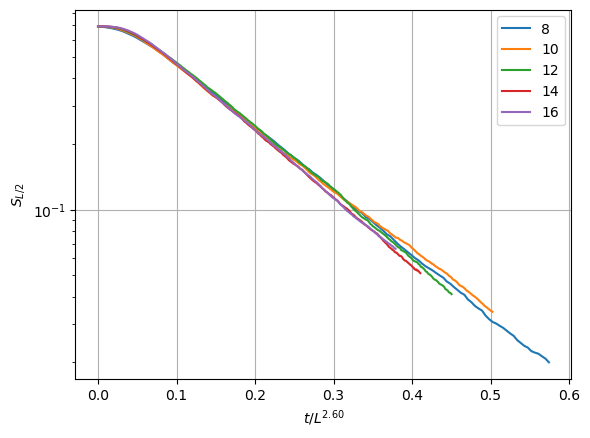

In [156]:
L_list=np.arange(8,18,2)
fig,ax=plt.subplots()
z=2.6
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.42).xs(level='p_proj',key=0.3)['observations'][L]
    t_list=np.arange(data.shape[0])
    # ax.errorbar(np.log(t_list/L**z+1),data.mean(axis=-1),data.std(axis=-1)/np.sqrt(data.shape[-1]),label=L,capsize=3)
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

# ax.axvline(x=0.85)

In [ ]:
but this could also because of the MIPT and CIPT are too close?



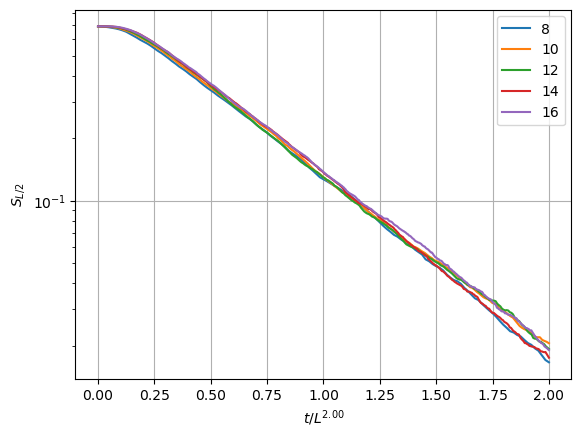

In [108]:
L_list=np.arange(8,18,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.)['observations'][L]
    t_list=np.arange(data.shape[0])
    # ax.errorbar(np.log(t_list/L**z+1),data.mean(axis=-1),data.std(axis=-1)/np.sqrt(data.shape[-1]),label=L,capsize=3)
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

# ax.axvline(x=0.85)

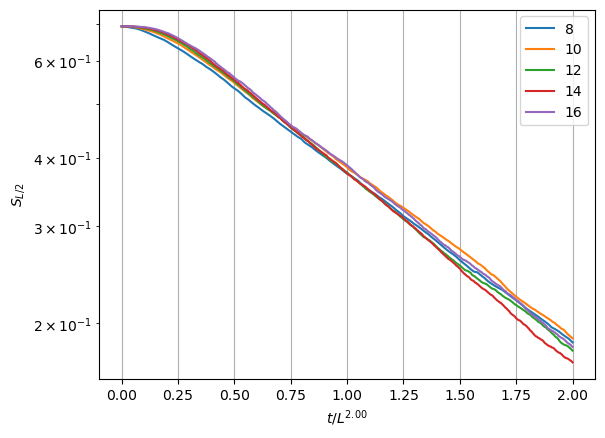

In [109]:
L_list=np.arange(8,18,2)
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.0).xs(level='p_proj',key=0.19)['observations'][L]
    t_list=np.arange(data.shape[0])
    # ax.errorbar(np.log(t_list/L**z+1),data.mean(axis=-1),data.std(axis=-1)/np.sqrt(data.shape[-1]),label=L,capsize=3)
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

# ax.axvline(x=0.85)

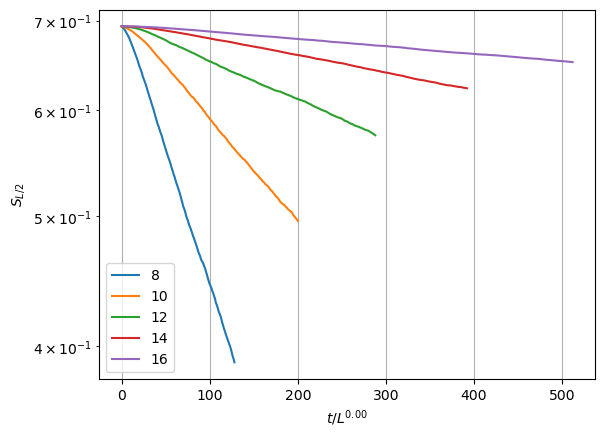

In [153]:
L_list=np.arange(8,18,2)
fig,ax=plt.subplots()
z=0
for L in L_list:
    data=df_1_3_anc_T.xs(level='Metrics',key='SA').xs(level='p_ctrl',key=0.3).xs(level='p_proj',key=0.)['observations'][L]
    t_list=np.arange(data.shape[0])
    # ax.errorbar(np.log(t_list/L**z+1),data.mean(axis=-1),data.std(axis=-1)/np.sqrt(data.shape[-1]),label=L,capsize=3)
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$S_{anc}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_yscale('log')

# ax.axvline(x=0.85)

In [21]:
with open('Data/Metrics/1-3,2-3_anc_T/CT_En2000_pctrl(0.42,0.42,1)_pproj(0.30,0.30,1)_L(8,10,2)_xj(1-3,2-3)_seed0_64_anc_T.pickle','rb') as f:
    zz=pickle.load(f)

In [22]:
zz

{'SA': tensor([[[[[-1.3863e+00, -1.3863e+00, -1.3863e+00,  ..., -1.3863e+00,
             -1.3863e+00, -1.3863e+00],
            [ 1.1921e-07, -1.3863e+00,  1.1921e-07,  ...,  1.1921e-07,
              1.1921e-07,  1.1921e-07],
            [ 1.7028e-13,  5.7570e-14,  1.1921e-07,  ...,  1.2250e-14,
              2.1897e-14, -4.7684e-07],
            ...,
            [-2.3842e-07,  2.8039e-14,  6.1788e-13,  ...,  1.1921e-07,
              2.9239e-13, -2.3842e-07],
            [-2.3842e-07,  3.6440e-14,  2.8310e-13,  ...,  3.3986e-13,
              2.4283e-13,  1.5006e-13],
            [ 9.8686e-14,  3.6439e-14,  1.1921e-07,  ...,  4.9209e-13,
              2.3842e-07, -2.3842e-07]]]]]),
 'args': Namespace(es=2000, seed=0, p_ctrl=[0.42, 0.42, 1.0], p_proj=[0.3, 0.3, 1.0], L=[8, 10, 2], xj='1/3,2/3', complex128=False, ancilla=True, no_feedback=False, add_x=0)}